In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Code KNN

In [9]:
def euclidean_distance(instance1,instance2):
    distance=0
    for i in range(len(instance1)):
            s=(instance1[i]-instance2[i])**2
            distance+= s
    return np.sqrt(distance)
    
def manahtan_distance(instance1,instance2):
    distance=0
    for i in range(len(instance1)):
            s=abs(instance1[i]-instance2[i])
            distance+= s
    return distance

In [10]:
def Neighbors(train_set,instance,func_distance):
    Distances =[]
    Neighbors=[]
    for index,train_instance in enumerate(train_set):
        Distances.append(func_distance(train_instance,instance))
        Neighbors.append(index)
    Distances=np.array(Distances)
    Neighbors=np.array(Neighbors)
    Neighbors=Neighbors[Distances.argsort()]
    return Neighbors
    

In [11]:
train_set=np.array([[1,0,0],[1,1,2],[2,1,2],[0,0,0],[3,1,1]])
print(Neighbors(train_set,[1,1,1],euclidean_distance))

[1 0 2 3 4]


In [12]:
def KNN(train_target,train_set,k,instance,f):
    Category={}
    KNN=Neighbors(train_set,instance,f)[:k]
    for i in KNN:
        if train_target[i] in Category.keys():
            Category[train_target[i]]+=1
        else:
            Category[train_target[i]]=1 
        Result=-10**99
        for key,values in Category.items():
            if values > Result:
                Result = key
        return key

# Score du model

In [13]:
def accuracy(test_set,test_target,train_set,train_target,k,f):
    score=0
    for i,j in zip(test_set,test_target):
        prediction = KNN(train_target,train_set,k,i,f)
        if prediction ==j:
            score+=1
    return (score/len(test_set))*100

In [19]:
nb_male=70
nb_female=70

#Pandas'Dataframe creation

from random import uniform
Size_male=np.random.uniform(160,180,nb_male).reshape((nb_male,1))
Weight_male=np.random.uniform(85,120,nb_male).reshape((nb_male,1))
Male=np.array([0 for i in range(nb_male)]).reshape((nb_male,1))
Panda_male=np.concatenate((Size_male,Weight_male),axis=1)
Panda_male=np.concatenate((Panda_male,Male),axis=1)

Size_female=np.random.uniform(150,170,nb_female).reshape((nb_female,1))
Weight_female=np.random.uniform(80,105,nb_female).reshape((nb_female,1))
Female=np.array([1 for i in range(nb_female)]).reshape((nb_female,1))
Panda_female=np.concatenate((Size_female,Weight_female),axis=1)
Panda_female=np.concatenate((Panda_female,Female),axis=1)

Size=np.concatenate((Size_female,Size_male),axis=0)
Weight=np.concatenate((Weight_female,Weight_male),axis=0)
Gender=np.concatenate((Female,Male))

Pandas=np.concatenate((Panda_female,Panda_male),axis=0)

Df_Pandas=pd.DataFrame(Pandas,columns=['Size','Weight','Gender'])
Df_Pandas.head()

#1=female
#0=Male

,Size,Weight,Gender
0,157.422500,92.606603,1.0
1,155.884708,87.706457,1.0
2,160.174852,86.490670,1.0
3,157.773720,102.094285,1.0
4,154.186999,102.886365,1.0


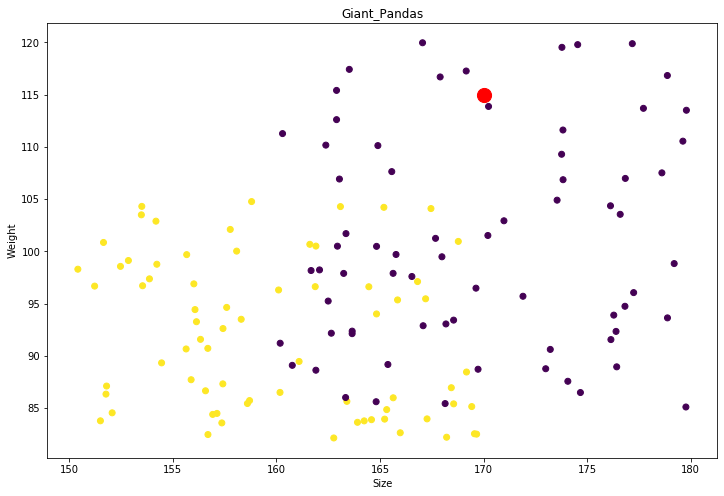

In [20]:


Panda_test=np.array([170,115])
plt.figure(figsize=(12,8))
plt.scatter(Size,Weight,c=Gender)
plt.scatter(Panda_test[0],Panda_test[1],c='red',s=200)
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Giant_Pandas')
plt.show()



Text(110, 180, 'Male')

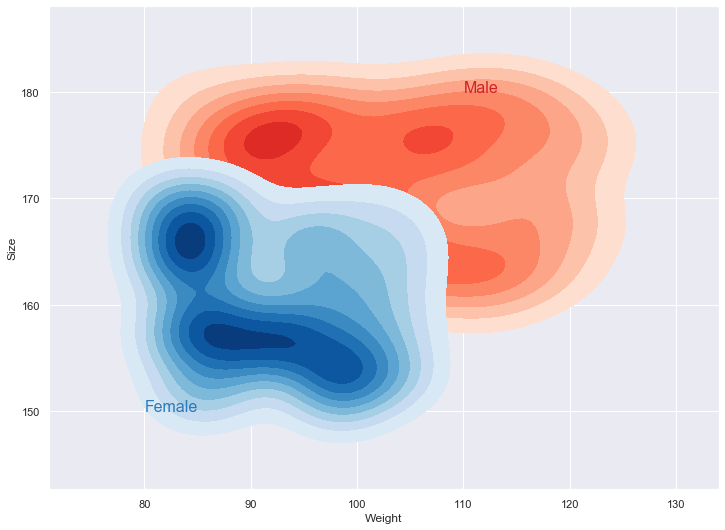

In [23]:
sns.set(style="darkgrid")

#axes
f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")

#data
ax = sns.kdeplot(Df_Pandas[Df_Pandas.Gender==0].Weight, Df_Pandas[Df_Pandas.Gender==0].Size,cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(Df_Pandas[Df_Pandas.Gender==1].Weight, Df_Pandas[Df_Pandas.Gender==1].Size,cmap="Blues", shade=True, shade_lowest=False)

#labels
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(80, 150, "Female", size=16, color=blue)
ax.text(110, 180, "Male", size=16, color=red)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Target = Pandas[:,2]
Features = Pandas[:,0:2]

X_train,X_test,y_train,y_test = train_test_split(Features,Target)
print(X_train)
print(y_train)

[[160.76674738  89.08342624]
 [170.20671508 101.51585666]
 [151.77510677  86.32917892]
 [162.38564922 110.16588727]
 [165.56838184 107.63092931]
 [179.61842076 110.54568084]
 [165.38121617  89.16541977]
 [166.5397369   97.58921571]
 [151.8036867   87.10000183]
 [167.20139061  95.45357801]
 [167.46010063 104.09256578]
 [163.40211471  85.63465377]
 [163.65527514  92.11653167]
 [179.76423176  85.09484932]
 [168.44197912  86.94123196]
 [162.49954384  95.23746901]
 [158.08180714 100.01931804]
 [164.83425439 100.47397692]
 [177.71437478 113.689242  ]
 [163.51899027 117.41899253]
 [172.99822043  88.75764484]
 [177.17723859 119.88089632]
 [162.9032076  115.40524383]
 [176.42456839  88.94027383]
 [167.68104677 101.2408928 ]
 [160.10607279  96.29842563]
 [167.90393187 116.69365563]
 [151.65581252 100.847262  ]
 [166.81292747  97.10378614]
 [173.82996628 111.6128805 ]
 [165.18792065 104.21085892]
 [176.84015817 106.97924002]
 [169.63247601  96.47163431]
 [160.18293601  91.20115641]
 [153.50468084

In [26]:
Panda_test=np.array([180,118])
k=3
KNN(y_train,X_train,k,Panda_test,euclidean_distance)

0.0

In [27]:
for i in range(1,20):
    print(i)
    print(accuracy(X_test,y_test,X_train,y_train,i,euclidean_distance))
    print(accuracy(X_test,y_test,X_train,y_train,i,manahtan_distance))

1
80.0
85.71428571428571
2
80.0
85.71428571428571
3
80.0
85.71428571428571
4
80.0
85.71428571428571
5
80.0
85.71428571428571
6
80.0
85.71428571428571
7
80.0
85.71428571428571
8
80.0
85.71428571428571
9
80.0
85.71428571428571
10
80.0
85.71428571428571
11
80.0
85.71428571428571
12
80.0
85.71428571428571
13
80.0
85.71428571428571
14
80.0
85.71428571428571
15
80.0
85.71428571428571
16
80.0
85.71428571428571
17
80.0
85.71428571428571
18
80.0
85.71428571428571
19
80.0
85.71428571428571


In [28]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


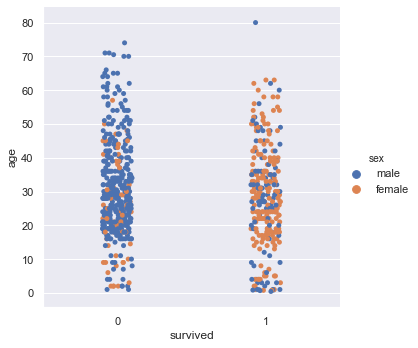

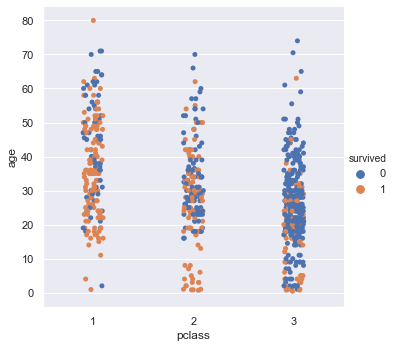

In [29]:
sns.catplot(x='survived',y='age',data=titanic,hue='sex')
sns.catplot(x='pclass',y='age',data=titanic,hue='survived')

In [30]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace = True)
titanic['sex'].replace(['male','female'],[0,1], inplace=True)
titanic.head()

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [32]:
model = KNeighborsClassifier()
y = titanic['survived']
x = titanic.drop('survived',axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7653631284916201

In [33]:
def survie(model,pclass,sex,age):
    x= np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [34]:
survie(model,3,0,21)

[0]
[[0.8 0.2]]


In [35]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'n_neighbors':np.arange(1,50),'metric':['euclidean','manhattan'],'weights':['uniform','distance']}
grid = GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train,y_train)

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='manhattan',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=11, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}

In [42]:
model = grid.best_estimator_
model.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
y = model.predict(X_test)
confusion_matrix(y_test,y)


array([[94,  6],
       [28, 51]], dtype=int64)